In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

## Recopilación de datos

In [3]:
data =  pd.read_csv("/workspaces/Gupir11-machine-learning/data/raw/bank-marketing-campaign-data.csv",sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Análisis Descriptivo

In [4]:
f" Total de filas, {data.shape[0]} total de columnas {data.shape[1]}"

' Total de filas, 41188 total de columnas 21'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Observaciones
Una vez hemos obtenido esta información:

Existen un total de 41188 filas (en este caso, datos de clientes) y 21 columnas, entre las cuales encontramos el target o clase a predecir, "y".
todas las variables tienen datos, ninguna tiene valores nulos.
Los datos cuentan con 10 características numéricas y 11 características categóricas.

## Limpieza de Datos

In [7]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [8]:
if data.duplicated().sum():
    data = data.drop_duplicates()

data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


En este caso solo encontramos con 11 datos dublicados y son eliminados

## Análisis de Variables

In [9]:
columnas_categoricas = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
columnas_numericas = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','duration']

### Análisis de Variables Univariante Categóricas

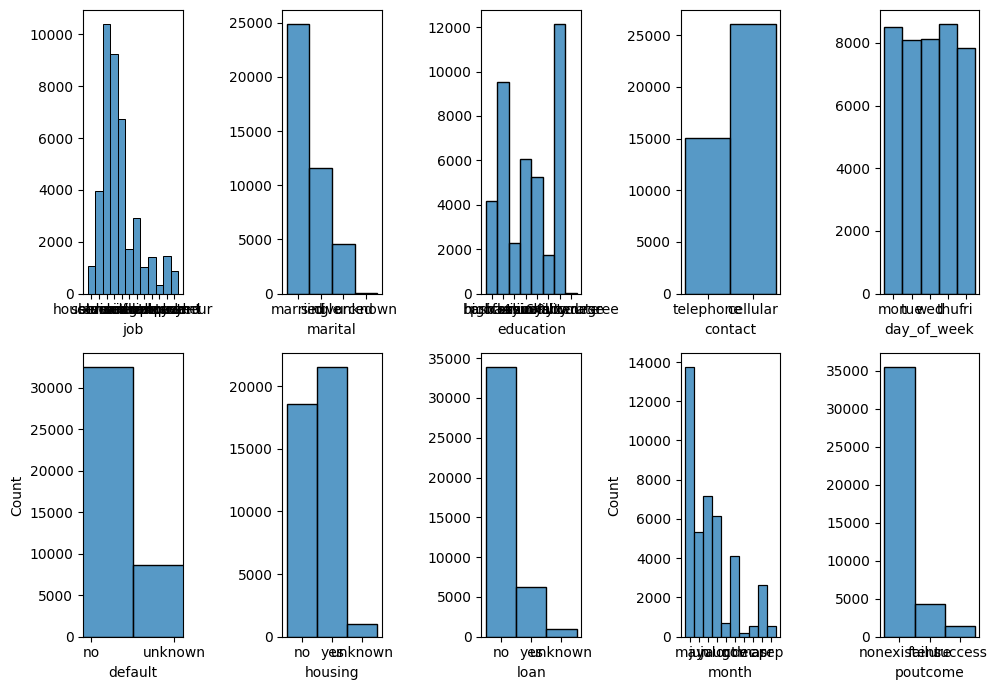

In [10]:
fig, axis = plt.subplots(2,5, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=data, x="job").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=data, x="marital").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=data, x="education").set(ylabel=None)
sns.histplot(ax=axis[0, 3], data=data, x="contact").set(ylabel=None)
sns.histplot(ax=axis[0, 4], data=data, x="day_of_week").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=data, x="default").set_xlim(-0.1, 1.1)
sns.histplot(ax=axis[1, 1], data=data, x="housing").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=data, x="loan").set(ylabel=None)
sns.histplot(ax=axis[1, 3], data=data, x="month")
sns.histplot(ax=axis[1, 4], data=data, x="poutcome").set(ylabel=None)

plt.tight_layout()
plt.show()

### Análisis de Variables Univariante Numéricas

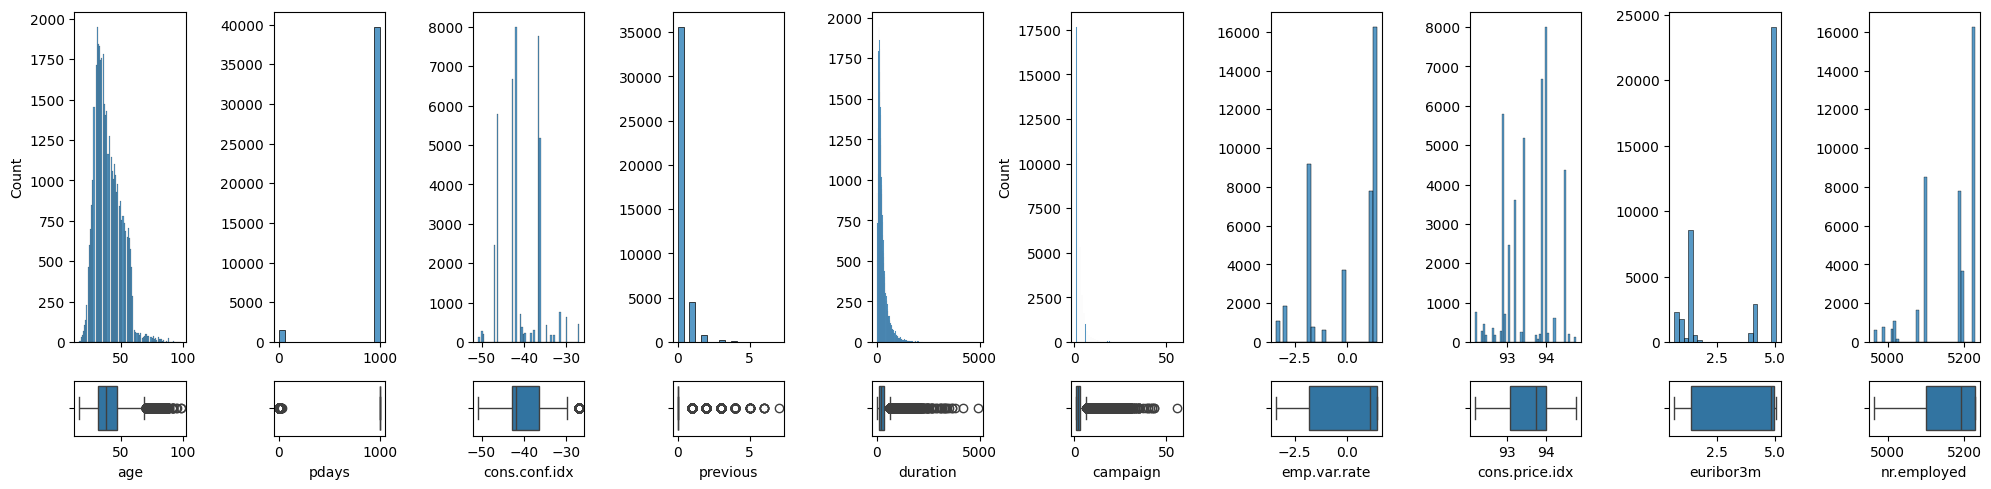

In [11]:
fig, axis = plt.subplots(2, 10, figsize=(20, 5), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=data, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=data, x="age")
sns.histplot(ax=axis[0,1 ], data=data, x="pdays").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=data, x="pdays")
sns.histplot(ax=axis[0, 2], data=data, x="cons.conf.idx").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1,2], data=data, x="cons.conf.idx")
sns.histplot(ax=axis[0, 3], data=data, x="previous").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 3], data=data, x="previous")
sns.histplot(ax=axis[0, 4], data=data, x="duration").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 4], data=data, x="duration")
sns.histplot(ax=axis[0, 5], data=data, x="campaign").set(xlabel=None)
sns.boxplot(ax=axis[1, 5], data=data, x="campaign")
sns.histplot(ax=axis[0,6 ], data=data, x="emp.var.rate").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 6], data=data, x="emp.var.rate")
sns.histplot(ax=axis[0, 7], data=data, x="cons.price.idx").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1,7], data=data, x="cons.price.idx")
sns.histplot(ax=axis[0, 8], data=data, x="euribor3m").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 8], data=data, x="euribor3m")
sns.histplot(ax=axis[0, 9], data=data, x="nr.employed").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 9], data=data, x="nr.employed")



plt.tight_layout()
plt.show()

#### Correlacion entre varaibles numericas

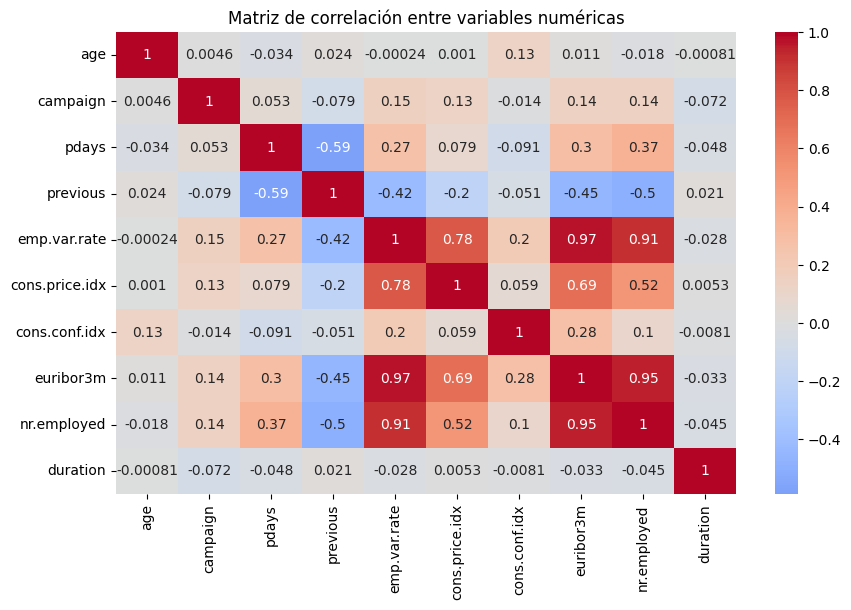

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data[columnas_numericas].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

#### Análisis multivariante con el target (y)

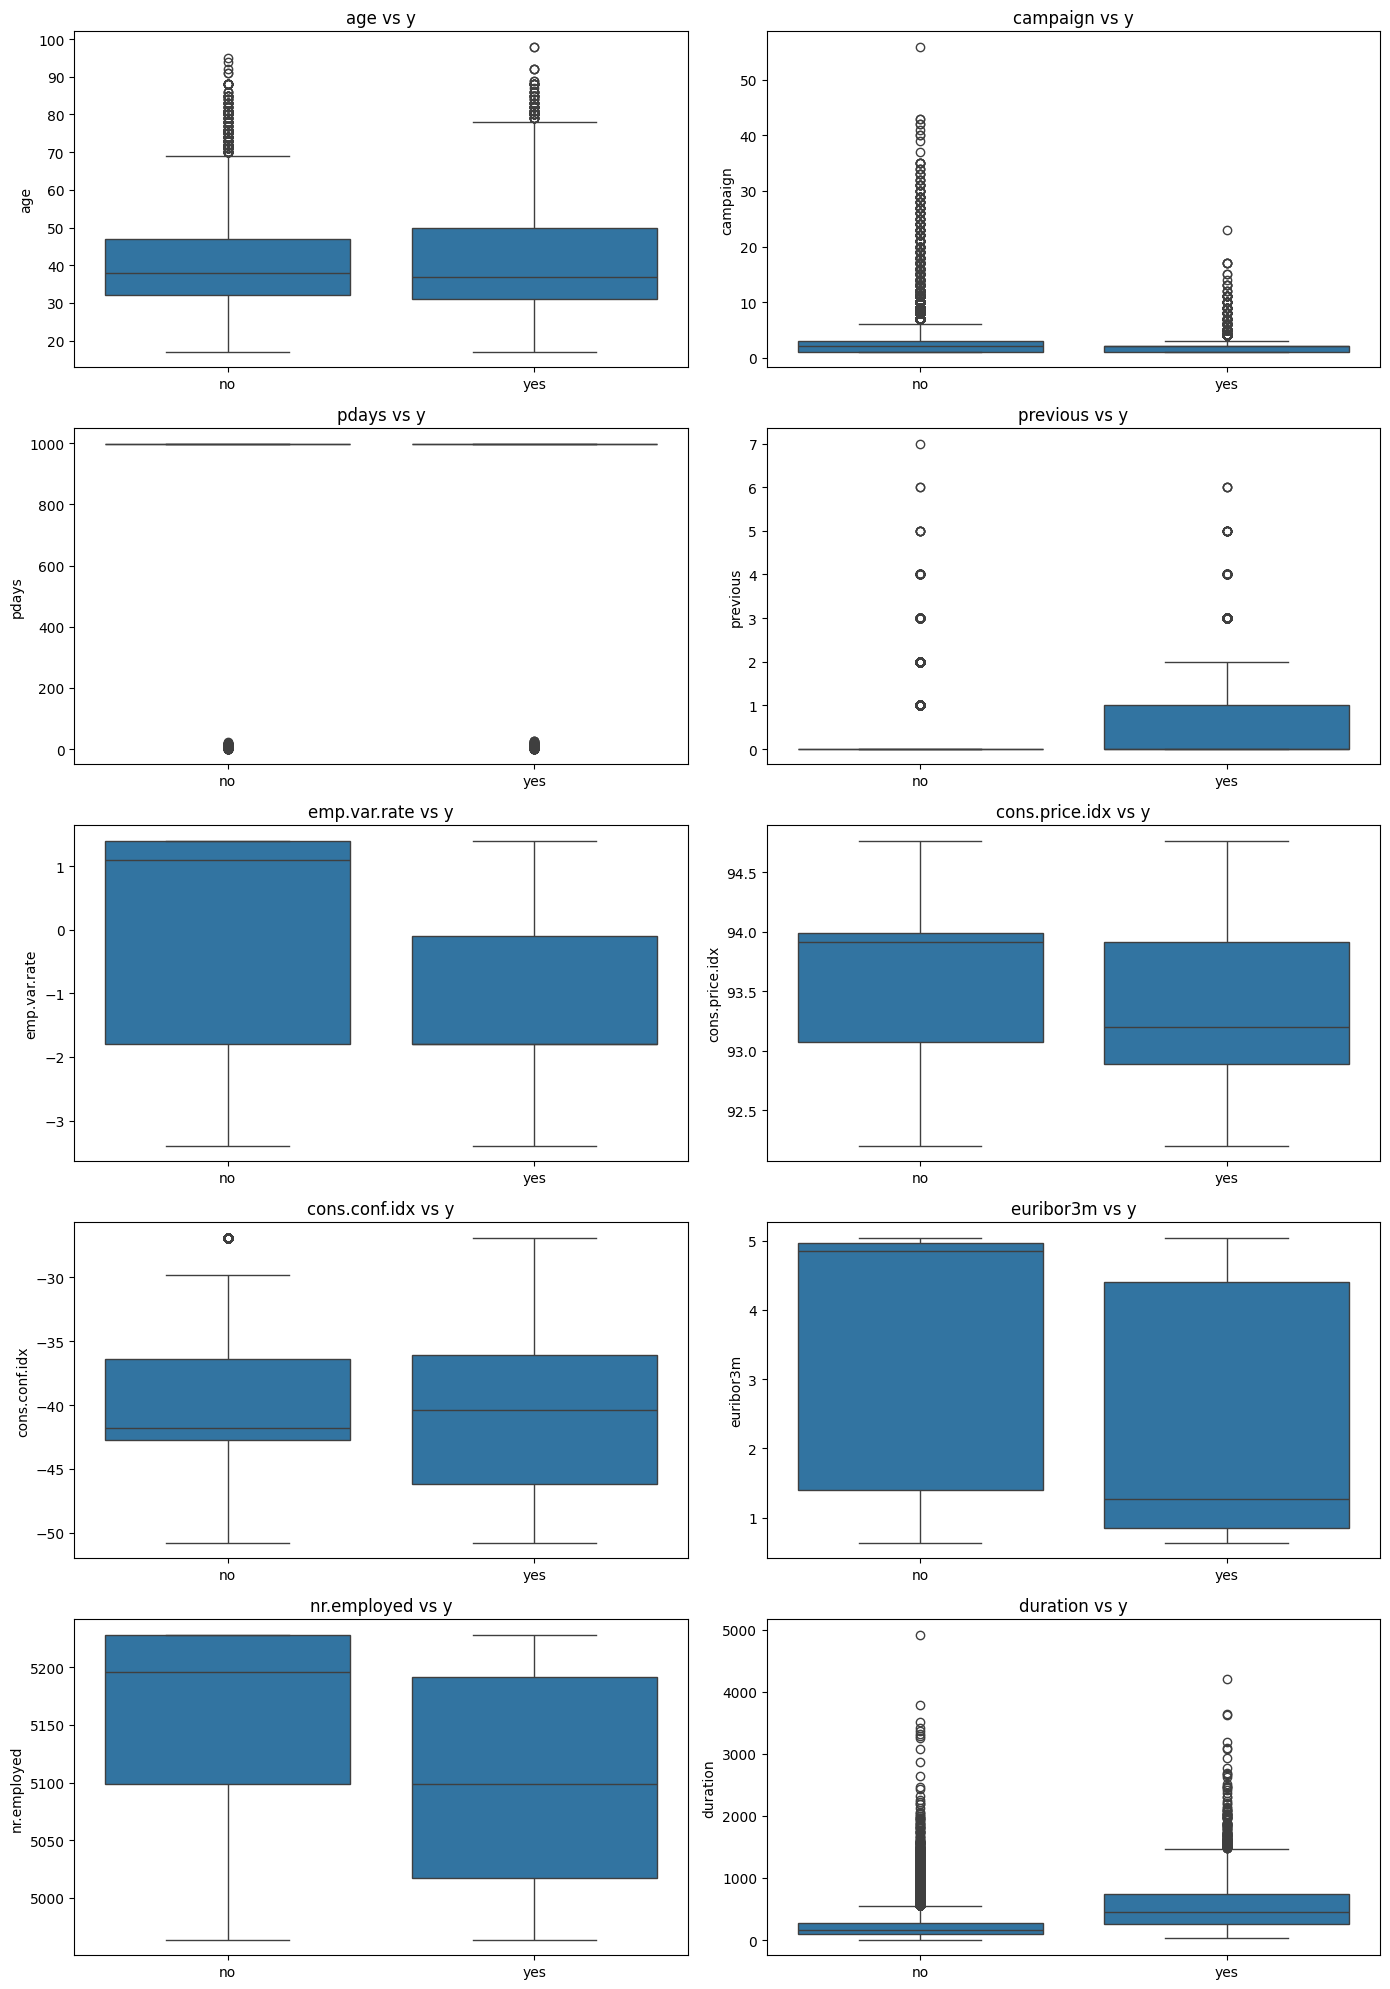

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))  # 5 filas x 2 columnas
axes = axes.flatten() 

for i, col in enumerate(columnas_numericas):
    sns.boxplot(data=data, x='y', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs y', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlacion entre todas las vairables 

In [14]:
data_corr = data.copy()
for col in data_corr.columns:
    if data_corr[col].dtype == 'object':
        data_corr[col], _ = pd.factorize(data_corr[col])
data_corr.dtypes


age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

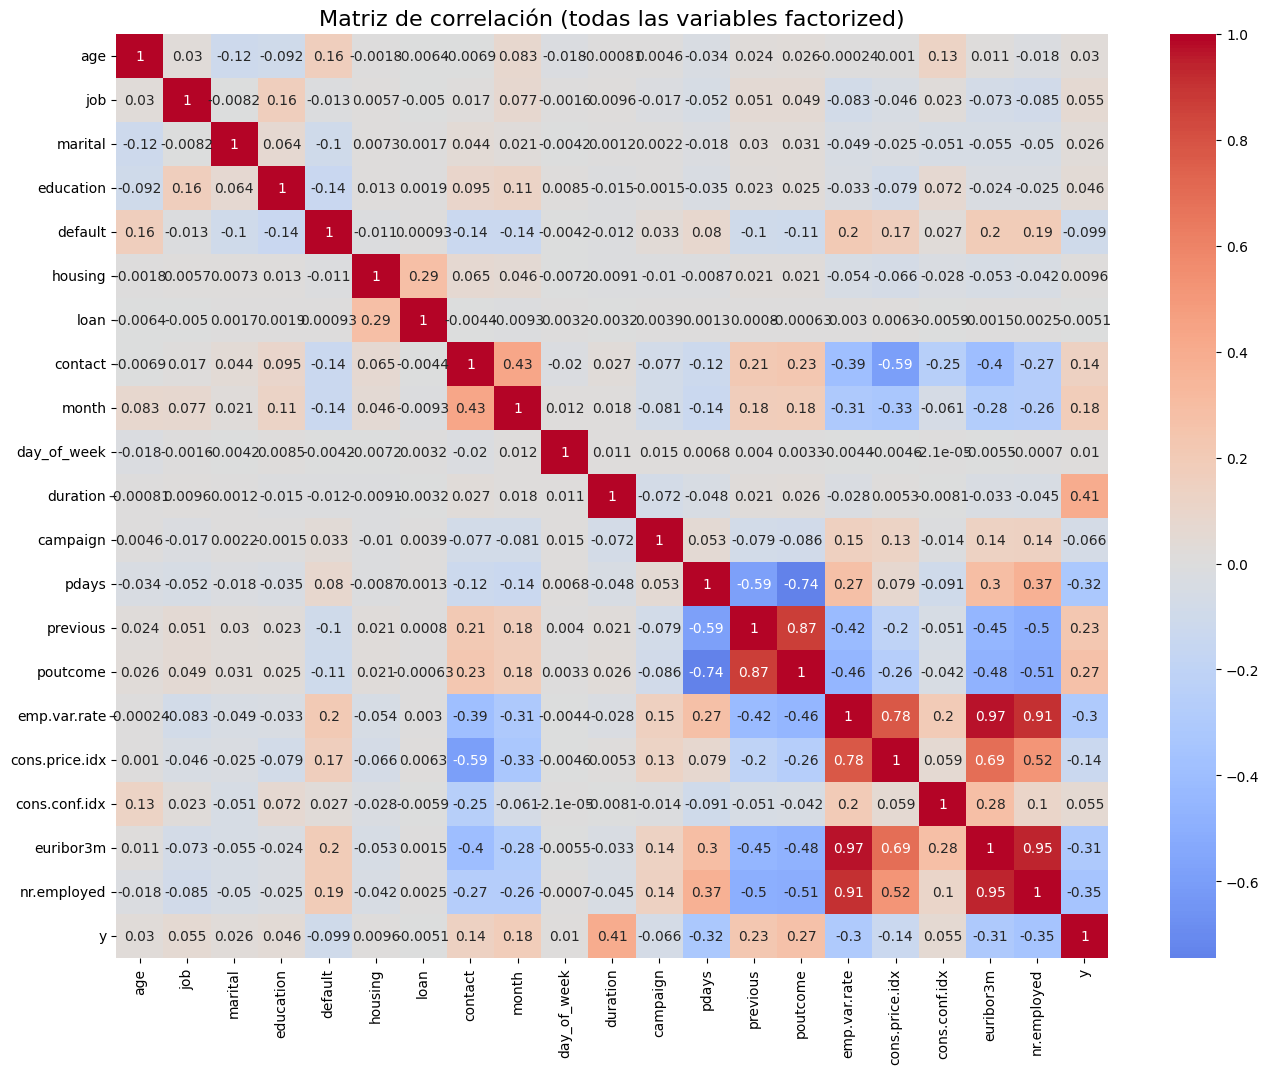

In [15]:
corr_matrix = data_corr.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación (todas las variables factorized)', fontsize=16)
plt.show()

### Observaciones 
luego de revisar todas las graficas lo mejor es equdarnos eliminar las siguientes columnas: duration, age, nr.employed, cons.price.idx
la primera tiene demasiada correlacion con nuestro target lo que no nos serviria para nuestro modelo
la variable age no representa algo significativo para analizar o ayudarnos
y nr.employed, cons.price.idx son redundantes con euribor y emp.var.rate.

## Ingeniería de características

### observaciones
como anteriormente no encontramos datos faltantes no hace falta hacer nuecamente el estudio, tambien en las graficas pudimos ver que los outliers no representaban ninguna dosinancia o algo muy fuera de lo comun 

In [16]:
data['was_contacted_before'] = (data['pdays'] != 999).astype(int)


Convertimos a pdays a binaria para que sea mas facil de manejar. 

In [17]:
data.drop(['duration', 'emp.var.rate', 'nr.employed', 'pdays'], axis = 1, inplace = True)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y,was_contacted_before
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,4.857,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,4.857,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,4.857,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,4.857,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,93.994,-36.4,4.857,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,94.767,-50.8,1.028,yes,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,94.767,-50.8,1.028,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,94.767,-50.8,1.028,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,94.767,-50.8,1.028,yes,0


## Split 

In [18]:
X = data.drop('y', axis=1)
y = data['y']


separamos 'y' para trabajar en nuestros y empezar con el split para train y test 

In [19]:
categorical_features = ['job', 'marital', 'education','default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome']
numeric_features = ['age','campaign','previous','euribor3m','cons.price.idx','cons.conf.idx','was_contacted_before']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18,
                                                    stratify=y
)

## Scaling & Encoding

### Encoding

In [21]:
encoder = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)
encoder.fit(X_train[categorical_features])
X_train_cat = encoder.transform(X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])


### Scaling

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train[numeric_features])
X_train_num = scaler.transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])


In [23]:
X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])

In [24]:
num_cols = numeric_features
cat_cols = encoder.get_feature_names_out(categorical_features)

final_columns = np.concatenate([num_cols, cat_cols])

##  Inicialización y entrenamiento del modelo

In [25]:
model = LogisticRegression(max_iter=1000, class_weight='balanced',random_state=18)
model.fit(X_train_final, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,18
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [26]:
y_pred = model.predict(X_test_final)
y_proba = model.predict_proba(X_test_final)[:, 1] 

In [29]:
model_accuracy = accuracy_score(y_test, y_pred)
f' Prediccion del modelo es: {model_accuracy}'

' Prediccion del modelo es: 0.8177513355998057'

El modelo predice con un 81.7% de efectividad

In [1]:
confusion_matriz = confusion_matrix(y_test, y_pred, labels=['no', 'yes'])

sns.heatmap(confusion_matriz, annot=True, fmt="d", cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

NameError: name 'confusion_matrix' is not defined